In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
def oracle(circuit, q_alice, q_bob, q_oracle, q_oracle_ancilla):
    n = int(q_alice.size/2)
    for i in range(n):
        circuit.cx(q_alice[i], q_bob[i])
        circuit.x(q_bob[i])
        circuit.x(q_bob[i+1])
        circuit.cx(q_alice[i+1], q_bob[i+1])
        circuit.ccx(q_bob[i], q_bob[i+1], q_oracle[i])
    circuit.barrier()
    circuit.cx(q_oracle, q_oracle_ancilla)
    circuit.barrier() 
    for i in range(n):
        circuit.ccx(q_bob[i], q_bob[i+1], q_oracle[i])
        circuit.cx(q_alice[i+1], q_bob[i+1])
        circuit.x(q_bob[i])
        circuit.cx(q_alice[i], q_bob[i])
        circuit.x(q_bob[i+1])
    circuit.barrier()

In [3]:
def phase_shift(circuit, vertices):
    n = int(vertices.size / 2)
    circuit.h(vertices)
    circuit.x(vertices)
    for i in range(n):
        circuit.h(vertices[i + 1])
        circuit.cx(vertices[i], vertices[i + 1])
        circuit.h(vertices[i + 1])
    circuit.x(vertices)
    circuit.h(vertices)
    circuit.barrier()

In [4]:
n_iteration = 2
vertices = 2  #2^2 = 4 

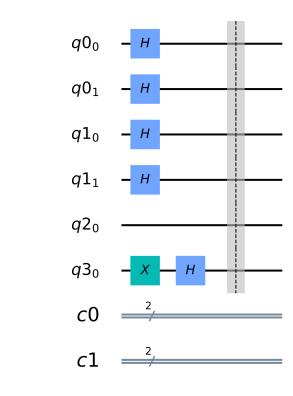

In [5]:
n_oracle = 1
q_alice = QuantumRegister(2)
q_bob = QuantumRegister(2)
circuit = QuantumCircuit(q_alice)
circuit.add_register(q_bob)
circuit.h(q_alice)
circuit.h(q_bob)
q_oracle= QuantumRegister(n_oracle)
q_oracle_ancilla = QuantumRegister(n_oracle)

c_alice = ClassicalRegister(2)
c_bob = ClassicalRegister(2)

circuit.add_register(q_oracle)
circuit.add_register(q_oracle_ancilla)
circuit.add_register(c_alice)
circuit.add_register(c_bob)
circuit.x(q_oracle_ancilla)
circuit.h(q_oracle_ancilla)
circuit.barrier()
circuit.draw(output='mpl')

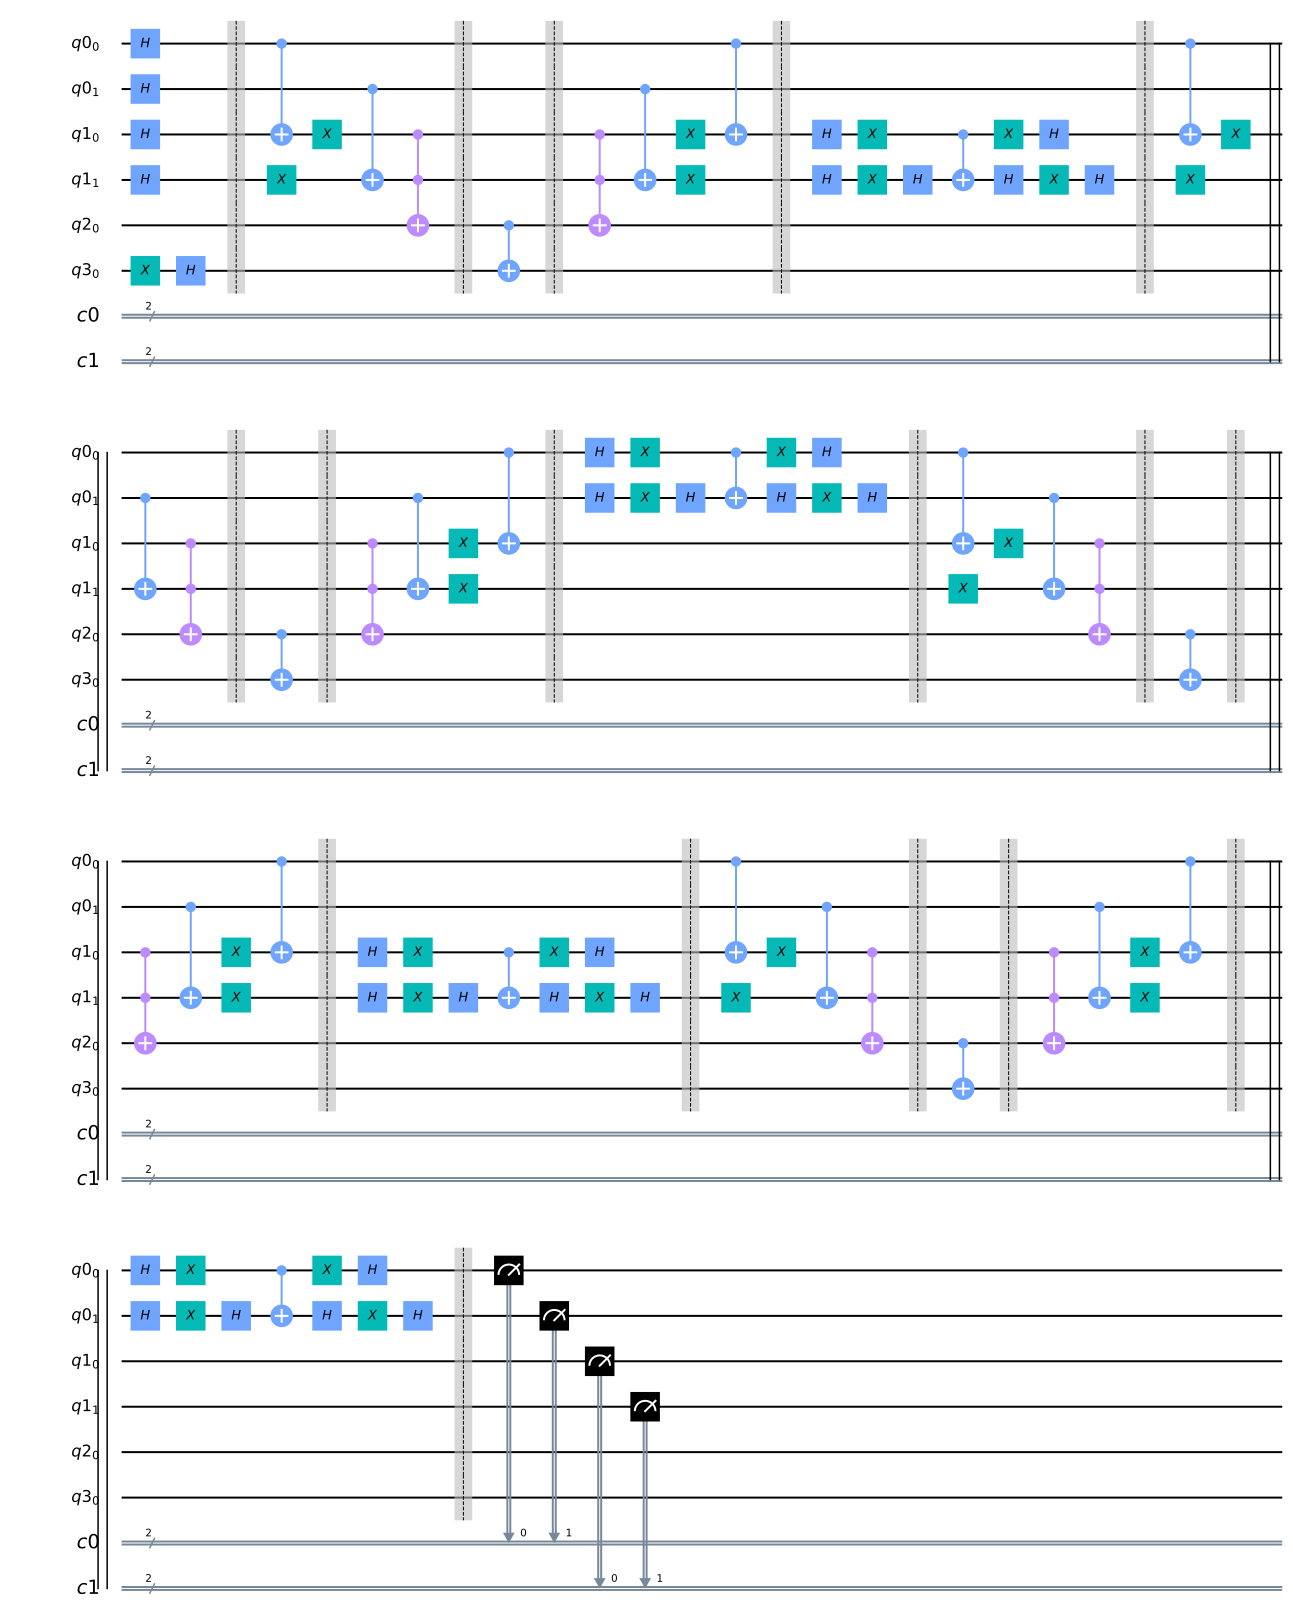

In [6]:
for i in range(n_iteration):
    oracle(circuit, q_alice, q_bob, q_oracle, q_oracle_ancilla)
    phase_shift(circuit, q_bob)
    oracle(circuit, q_alice, q_bob, q_oracle, q_oracle_ancilla)
    phase_shift(circuit, q_alice)
circuit.measure(q_alice, c_alice)
circuit.measure(q_bob, c_bob)

counts = execute(circuit, Aer.get_backend('qasm_simulator'), shots=1024).result().get_counts()
winners = [counts.get(k) for k in counts.keys() if k[:vertices] == k[vertices + 1:vertices * 2 + 1]]
circuit.draw(output='mpl')


([<matplotlib.axis.XTick at 0x1245990f0>,
 [Text(0, 0, '11 11'),
  Text(0, 0, '10 10'),
  Text(0, 0, '00 00'),
  Text(0, 0, '01 01')])

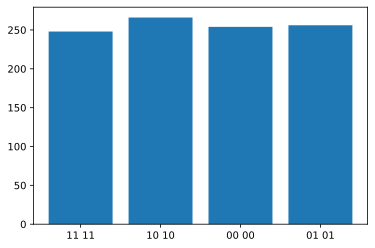

In [7]:
count_value = [counts.get(k) for k in counts.keys()]
count_label = [k for k in counts.keys()]
x = np.arange(len(counts))
plt.bar(x, height=count_value)
plt.xticks(x, count_label)